In [1]:
from PIL import Image
import cv2
import pytesseract
import matplotlib.pyplot as plt
import easyocr

In [28]:
!pip install --upgrade Pillow



Defaulting to user installation because normal site-packages is not writeable


In [2]:
# Load the image
image_path = 'IMG_5762.JPG'
image = Image.open(image_path)
cvimage = cv2.imread(image_path)

In [3]:
# Define the coordinates for the rectangular region
# (left, upper, right, lower)
left = 400
upper = 250
right = 2000
lower = 450

In [4]:
# Crop the image
cropped_rectangle = image.crop((left, upper, right, lower))

# Save or display the cropped rectangular region
cropped_rectangle.save('cropped_rectangle.jpg')

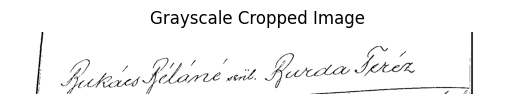

In [5]:
cropped = cvimage[upper:lower, left:right]

#grayscaling
gray_cropped = cv2.cvtColor(cropped, cv2.COLOR_BGR2GRAY)

#thresholding
_, thresh_gray_cropped = cv2.threshold(gray_cropped, 150, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.imshow(thresh_gray_cropped, cmap='gray')
plt.axis('off')  # Hide axis labels
plt.title('Grayscale Cropped Image')
plt.show()

In [6]:
#Tesseract - didn't work

# Use Tesseract to perform OCR on the thresholded ROI
text = pytesseract.image_to_string(thresh_gray_cropped, config='--psm 1')

# Print the extracted text
print("Extracted Text from Handwriting:")
print(text)

Extracted Text from Handwriting:
| GY
/ (ty oo Oy



In [16]:
reader = easyocr.Reader(['en'])
results = reader.readtext('test1.jpg')

for (bbox, text, prob) in results:
    print(f"Detected Text: {text} (Confidence: {prob:.2f})")

Detected Text: We Stact With Good (Confidence: 0.37)
Detected Text: Because (Confidence: 0.93)
Detected Text: all businesses (Confidence: 0.93)
Detected Text: should (Confidence: 1.00)
Detected Text: be doinq (Confidence: 0.51)
Detected Text: Somathing (Confidence: 0.48)
Detected Text: 9od (Confidence: 0.23)
